In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
if not "/home/jeon/jeonpkg" in sys.path:
    sys.path.append("/home/jeon/jeonpkg")
    print("/home/jeon/jeonpkg update")
from importlib import reload
import jeon as jn
import jfiles as jf
import jplots as jp
from rur import uri, uhmi, painter, drawer

import os
# from rur import uri, uhmi, painter
import time
from matplotlib.ticker import MultipleLocator
import gc

from tree_utool import *
gc.collect()

0

In [2]:
def return_fat(target, usefat2=False):
    fat = target['fat1']
    if fat > 0:
        return fat
    if usefat2:
        fat = target['fat2']
        if fat > 0:
            return fat
        else:
            return None

def return_branch(target, tm=None, usefat2=False):
    if 'nparts' in target.dtype.names:
        iout, istep = jn.ioutistep(target, galaxy=True, mode=mode)
        target = tm.loadgals(istep, target['id'])
    istep = target['timestep']
    leng = istep - np.min( list(tm.dat.keys()) )
    fat = return_fat(target, usefat2=usefat2)
    if fat is None:
        # print(f"broken at step={istep}")
        return np.atleast_1d(target)
    branch = target
    for i in range(leng):
        igal = tm.loadgals(istep-1-i, fat)
        branch = np.hstack((branch, igal))
        fat = return_fat(igal, usefat2=usefat2)
        if fat is None:
            # if istep-i-1 > 1:
                # print(f"broken at step={istep-i-1}")
            return branch
    return branch

In [6]:
# modes = ['y07206', 'y04466', 'y10002']
# mode = modes[0]
mode = 'nh'
# nout, nstep, zred, aexp, gyr = jn.pklload(f'/storage6/jeon/data/{mode}/{mode}_nout_nstep_zred_aexp_gyr.pickle')
nout = load_nout(mode=mode, galaxy=True)
nstep = load_nstep(mode=mode, galaxy=True, nout=nout)
print(nstep[0])
# repo = f'/storage3/Clusters/{mode[1:]}'
repo = f"/storage6/NewHorizon"
# TreeMaker
# tm = jn.pklload(f"/storage6/jeon/data/{mode}/tm/{mode}_TreeMaker.pickle")
# galtm = jn.treemaker(galaxy=True, tm=tm, mode=mode)
# tm = None

path = "./data/"
file_list = os.listdir(path)
file_list = [file for file in file_list if (file.startswith(f"Branch_{mode}") & file.endswith(".pickle"))]

792


In [7]:
file_list

[]

In [75]:
# gals = galtm.loadtree(168)
# target = gals[np.random.randint(0, len(gals)-1,1)][0]
# TMbranch = np.atleast_1d(return_branch(target, tm=galtm, usefat2=True))
# plt.scatter(TMbranch['timestep'], TMbranch['m'], color='black' , label='TreeMaker', marker='o', alpha=0.5)

In [79]:
file_list

['Branch_y07206_00069.pickle']

In [80]:
# file = file_list[np.random.randint(0, len(file_list)-1)]
file = file_list[0]
readme, target, elapsed, YTbranch, scores = jn.pklload(path+file)
jn.printgal(target)
TMbranch = np.atleast_1d(return_branch(target, tm=galtm, usefat2=True))
YTbranch = np.hstack([item for key, item in YTbranch.items()])

[GalaxyMaker: hagn] ID=69, iout(istep)=187(162), logM=9.36


(-0.01, 1.01)

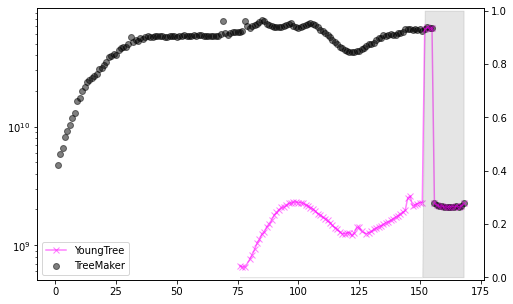

In [81]:
fig, ax = plt.subplots(figsize=(8,5))

offset = np.max(YTbranch['timestep'])-168
ax.plot(YTbranch['timestep']-offset, YTbranch['m'], color='magenta', label='YoungTree', marker='x', alpha=0.5)
ax.scatter(TMbranch['timestep'], TMbranch['m'], color='black' , label='TreeMaker', marker='o', alpha=0.5)
ax.set_yscale("log")
ax.legend()

leng = min(len(TMbranch), len(YTbranch))
x = YTbranch['timestep'][:leng]-offset
match = (YTbranch['id'][:leng] - TMbranch['id'][:leng]) == 0
ax2 = ax.twinx()
ax2.fill_between(x,np.zeros(len(x)),match, color='black', alpha=0.1)
ax2.set_ylim(-0.01, 1.01)